# Hierarchical Clustering

Build a hierarchy of clusters where each node is a cluster consists of the clusters of its daugther nodes

Divise

Agglomerative

Algorithm
1. Create *n* clusters, one for each data point
2. Compute the proximity Matrix
3. Repeat
  * Merge the two closest clusters
  * Update the proximity matrix
4. Until only a single cluster remains

Distance between clusters
* Single - linkage Clustering
  * Minimun distance between clusters
* Complete - linkage Clustering
  * Maximum distance between clusters
* Average Linkage Clusterting
  * Average distance between clusters
* Centroid Linkage Clustering
  * Distance between cluster centroids

Advantages
* Does not required number of clusters to be specified
* Easy to implement
* Produce a dendrogram, which helps with undertanding the data

Disadvantages
* Can never undo any previous steps throughout the algorithm
* Generally has long runtimes
* Sometimes difficult to identify the number of cluster by the dendogram

**Hierarchical clustering vs K - means**

*K - means*
* Much more efficient
* Requieres the number of clusters to be specified
* Gives only one partitioning of the data based on the predefined number of clusters
* potentially returns different cluster each time it is run due to random initialization

*hierarchical clustering*
* Can be slow for large dataset
* Does not require the number of clusters to run
* Gives more than one partitioning depending on the resolution
* always generates the same clusters


In [2]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

**Generating random data**

Input these parameters into make_blobs:
* n_samples: The total number of points equally divided among clusters.
  * Choose a number from 10-1500
* centers: The number of centers to generate, or the fixed center locations.
  * Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]])
* cluster_std: The standard deviation of the clusters. The larger the number, the further apart the clusters
  * Choose a number between 0.5-1.5

In [7]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

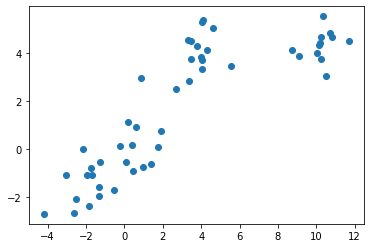

In [8]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

**Agglomerative Clustering**

* n_clusters: The number of clusters to form as well as the number of centroids to generate.
  * Value will be: 4
* linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
  * Value will be: 'complete'

Note: It is recommended you try everything with 'average' as well


In [9]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = "average")

In [10]:
agglom.fit(X1, y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

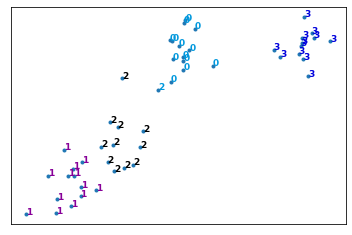

In [11]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize = (6, 4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis = 0), np.max(X1, axis = 0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

**Dendrogram Associated for the Agglomerative Hierarchical Clustering**

Remember that a distance matrix contains the distance from each point to every other point of a dataset .

Use the function distance_matrix, which requires two inputs. Use the Feature Matrix, X1 as both inputs and save the distance matrix to a variable called dist_matrix

Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct.

In [25]:
from scipy.spatial import distance_matrix

In [27]:
dist_matrix = distance_matrix(X1, X1)
print(dist_matrix)

[[0.         0.89860739 1.02849832 ... 0.91552086 0.88119742 0.10660083]
 [0.89860739 0.         0.14672185 ... 0.05064167 0.06168405 0.98050324]
 [1.02849832 0.14672185 0.         ... 0.11437304 0.14736255 1.11457825]
 ...
 [0.91552086 0.05064167 0.11437304 ... 0.         0.03651739 1.00070643]
 [0.88119742 0.06168405 0.14736255 ... 0.03651739 0.         0.96730244]
 [0.10660083 0.98050324 1.11457825 ... 1.00070643 0.96730244 0.        ]]


Using the linkage class from hierarchy, pass in the parameters:

* The distance matrix
* 'complete' for complete linkage

In [28]:
Z = hierarchy.linkage(dist_matrix, "complete")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

Next, we will save the dendrogram to a variable called dendro. In doing this, the dendrogram will also be displayed. Using the dendrogram class from hierarchy, pass in the parameter:

* Z

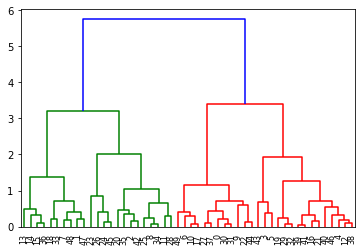

In [29]:
dendro = hierarchy.dendrogram(Z)

**Clustering on Vehicle dataset**

Imagine that an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

Our objective here, is to use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.

In [30]:
!wget -O cars_clus.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv

--2021-11-17 03:51:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0.001s  

2021-11-17 03:51:11 (13.1 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



**Load data**

In [38]:
df = pd.read_csv("cars_clus.csv")
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [50]:
df.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

The feature sets include price in thousands (price), engine size (engine_s), horsepower (horsepow), wheelbase (wheelbas), width (width), length (length), curb weight (curb_wgt), fuel capacity (fuel_cap) and fuel efficiency (mpg).

**Data cleaning**

In [39]:
df.isnull().sum()

manufact     2
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [40]:
df.dtypes

manufact      object
model         object
sales         object
resale        object
type          object
price         object
engine_s      object
horsepow      object
wheelbas      object
width         object
length        object
curb_wgt      object
fuel_cap      object
mpg           object
lnsales       object
partition    float64
dtype: object

All the feature columns data type are object, it seems to be float, so we need to change those values

In [51]:
float_columns = ["sales", "resale", "type", "price", "engine_s", "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap", "mpg", "lnsales"]

In [52]:
df[float_columns] = df[float_columns].apply(pd.to_numeric, errors='coerce')
df.dtypes

manufact      object
model         object
sales        float64
resale       float64
type         float64
price        float64
engine_s     float64
horsepow     float64
wheelbas     float64
width        float64
length       float64
curb_wgt     float64
fuel_cap     float64
mpg          float64
lnsales      float64
partition    float64
dtype: object

In [53]:
df.isnull().sum()

manufact      2
model         0
sales         2
resale       38
type          2
price         2
engine_s      1
horsepow      1
wheelbas      1
width         1
length        1
curb_wgt      2
fuel_cap      1
mpg           3
lnsales       2
partition     0
dtype: int64

It's interesting when we change the values object as type float, Now a few rows of the data are missing, we will change those missing values with **Average** for each column

In [55]:
for column in float_columns:
  avg = df[column].mean()
  df[column].replace(np.nan, avg, inplace = True)

In [56]:
df.isnull().sum()

manufact     2
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

The columns "manufact" have two missing values, it's a categorical value and the mos frecuent values are🇰
* ford
* Dodge

In [58]:
print("the types of manufact: {}".format(df["manufact"].unique()))

the types of manufact: ['Acura' 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Ford' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Lexus' 'Lincoln'
 'Mitsubishi' 'Mercury' 'Mercedes-Benz' 'Nissan' 'Oldsmobile' 'Plymouth'
 'Pontiac' 'Porsche' 'Saab' 'Saturn' 'Subaru' 'Toyota' 'Volkswagen'
 'Volvo' nan]


In [59]:
df["manufact"].value_counts()

Ford             11
Dodge            11
Chevrolet         9
Mercedes-Benz     9
Toyota            9
Nissan            7
Chrysler          7
Mitsubishi        7
Volvo             6
Volkswagen        6
Mercury           6
Pontiac           6
Lexus             6
Oldsmobile        6
Cadillac          5
Honda             5
Saturn            5
Plymouth          4
Buick             4
Acura             4
Porsche           3
BMW               3
Lincoln           3
Audi              3
Hyundai           3
Jeep              3
Saab              2
Subaru            2
Infiniti          1
Jaguar            1
Name: manufact, dtype: int64

In [65]:
common_manufact = df["manufact"].value_counts().idxmax()
df["manufact"].replace(np.nan, common_manufact, inplace = True)

In [66]:
df.isnull().sum()

manufact     0
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

**Feature selection**

In [67]:
features = ["engine_s", "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap", "mpg"]

**Normalization**

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
X = np.asanyarray(df[features])
norm = MinMaxScaler()
feature_mtx = norm.fit_transform(X)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.2716763 , 0.30625832,
        0.20233886, 0.13364055, 0.41935484],
       [0.31428571, 0.43037975, 0.3362256 , 0.44508671, 0.5792277 ,
        0.44112048, 0.31797235, 0.32258065],
       [0.31428571, 0.43037975, 0.31019523, 0.46242775, 0.56724368,
        0.42833832, 0.31797235, 0.35483871],
       [0.35714286, 0.39240506, 0.47722343, 0.50867052, 0.62849534,
        0.53168344, 0.35483871, 0.22580645],
       [0.11428571, 0.24050633, 0.21691974, 0.32369942, 0.38082557,
        0.2999728 , 0.28110599, 0.38709677]])

**Clustering using scipy**

In [70]:
import scipy

In [74]:
#distance matrix

leng = feature_mtx.shape[0]
D = scipy.zeros([leng, leng])
for i in range(leng):
  for j in range(leng):
    D[i, j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  after removing the cwd from sys.path.


array([[0.        , 0.56004708, 0.54342465, ..., 0.6575048 , 0.62435289,
        0.80552727],
       [0.56004708, 0.        , 0.04822732, ..., 0.23115617, 0.9070353 ,
        0.42690608],
       [0.54342465, 0.04822732, 0.        , ..., 0.23633051, 0.879962  ,
        0.42431572],
       ...,
       [0.6575048 , 0.23115617, 0.23633051, ..., 0.        , 0.98000482,
        0.38034196],
       [0.62435289, 0.9070353 , 0.879962  , ..., 0.98000482, 0.        ,
        1.00496569],
       [0.80552727, 0.42690608, 0.42431572, ..., 0.38034196, 1.00496569,
        0.        ]])

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:**- single - complete - average - weighted - centroid**



In [75]:
import pylab
import scipy.cluster.hierarchy

Z = hierarchy.linkage(D, "complete")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


Essentially, Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering. So you can use a cutting line:

In [77]:
from scipy.cluster.hierarchy import fcluster

max_d = 3
clusters = fcluster(Z, max_d, criterion = "distance")
clusters

array([ 1,  6,  6,  6,  8,  5, 12,  8,  8,  6,  6,  6,  5,  5,  5,  5,  5,
        6,  9,  1,  8,  6,  6,  6,  4,  1, 13,  6,  8,  8,  5,  8,  5,  6,
        5,  1,  8,  8,  5, 10,  9, 11,  9, 12, 12,  5,  1,  6,  8,  6,  1,
       12,  5, 12, 11,  6,  9,  1,  8,  8,  6,  5,  2,  1,  8,  6,  6,  3,
        7,  6,  6,  6,  5,  5, 11,  6,  5, 12,  9,  1,  8,  8,  6,  6,  5,
        7,  8,  8,  6, 12,  5,  5,  8,  6, 12,  4,  1,  1,  8, 12,  5,  1,
        8,  6,  5,  6,  6,  6,  8,  6,  8,  5,  6, 12,  1,  8,  5,  4,  8,
        8,  6,  6,  5, 12,  7,  7,  7,  8,  8,  1,  1,  1,  8,  8,  8,  8,
        1,  8,  6,  1,  1,  5,  1,  8, 11,  1,  1,  8,  1,  1,  1,  8,  8,
        8,  8,  6,  6,  2,  5], dtype=int32)

In [78]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

array([1, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2,
       2, 2, 2, 1, 5, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 4, 3, 4,
       4, 2, 1, 2, 2, 2, 1, 4, 2, 4, 4, 2, 3, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 4, 2, 1, 1, 2, 4, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 4, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 2], dtype=int32)

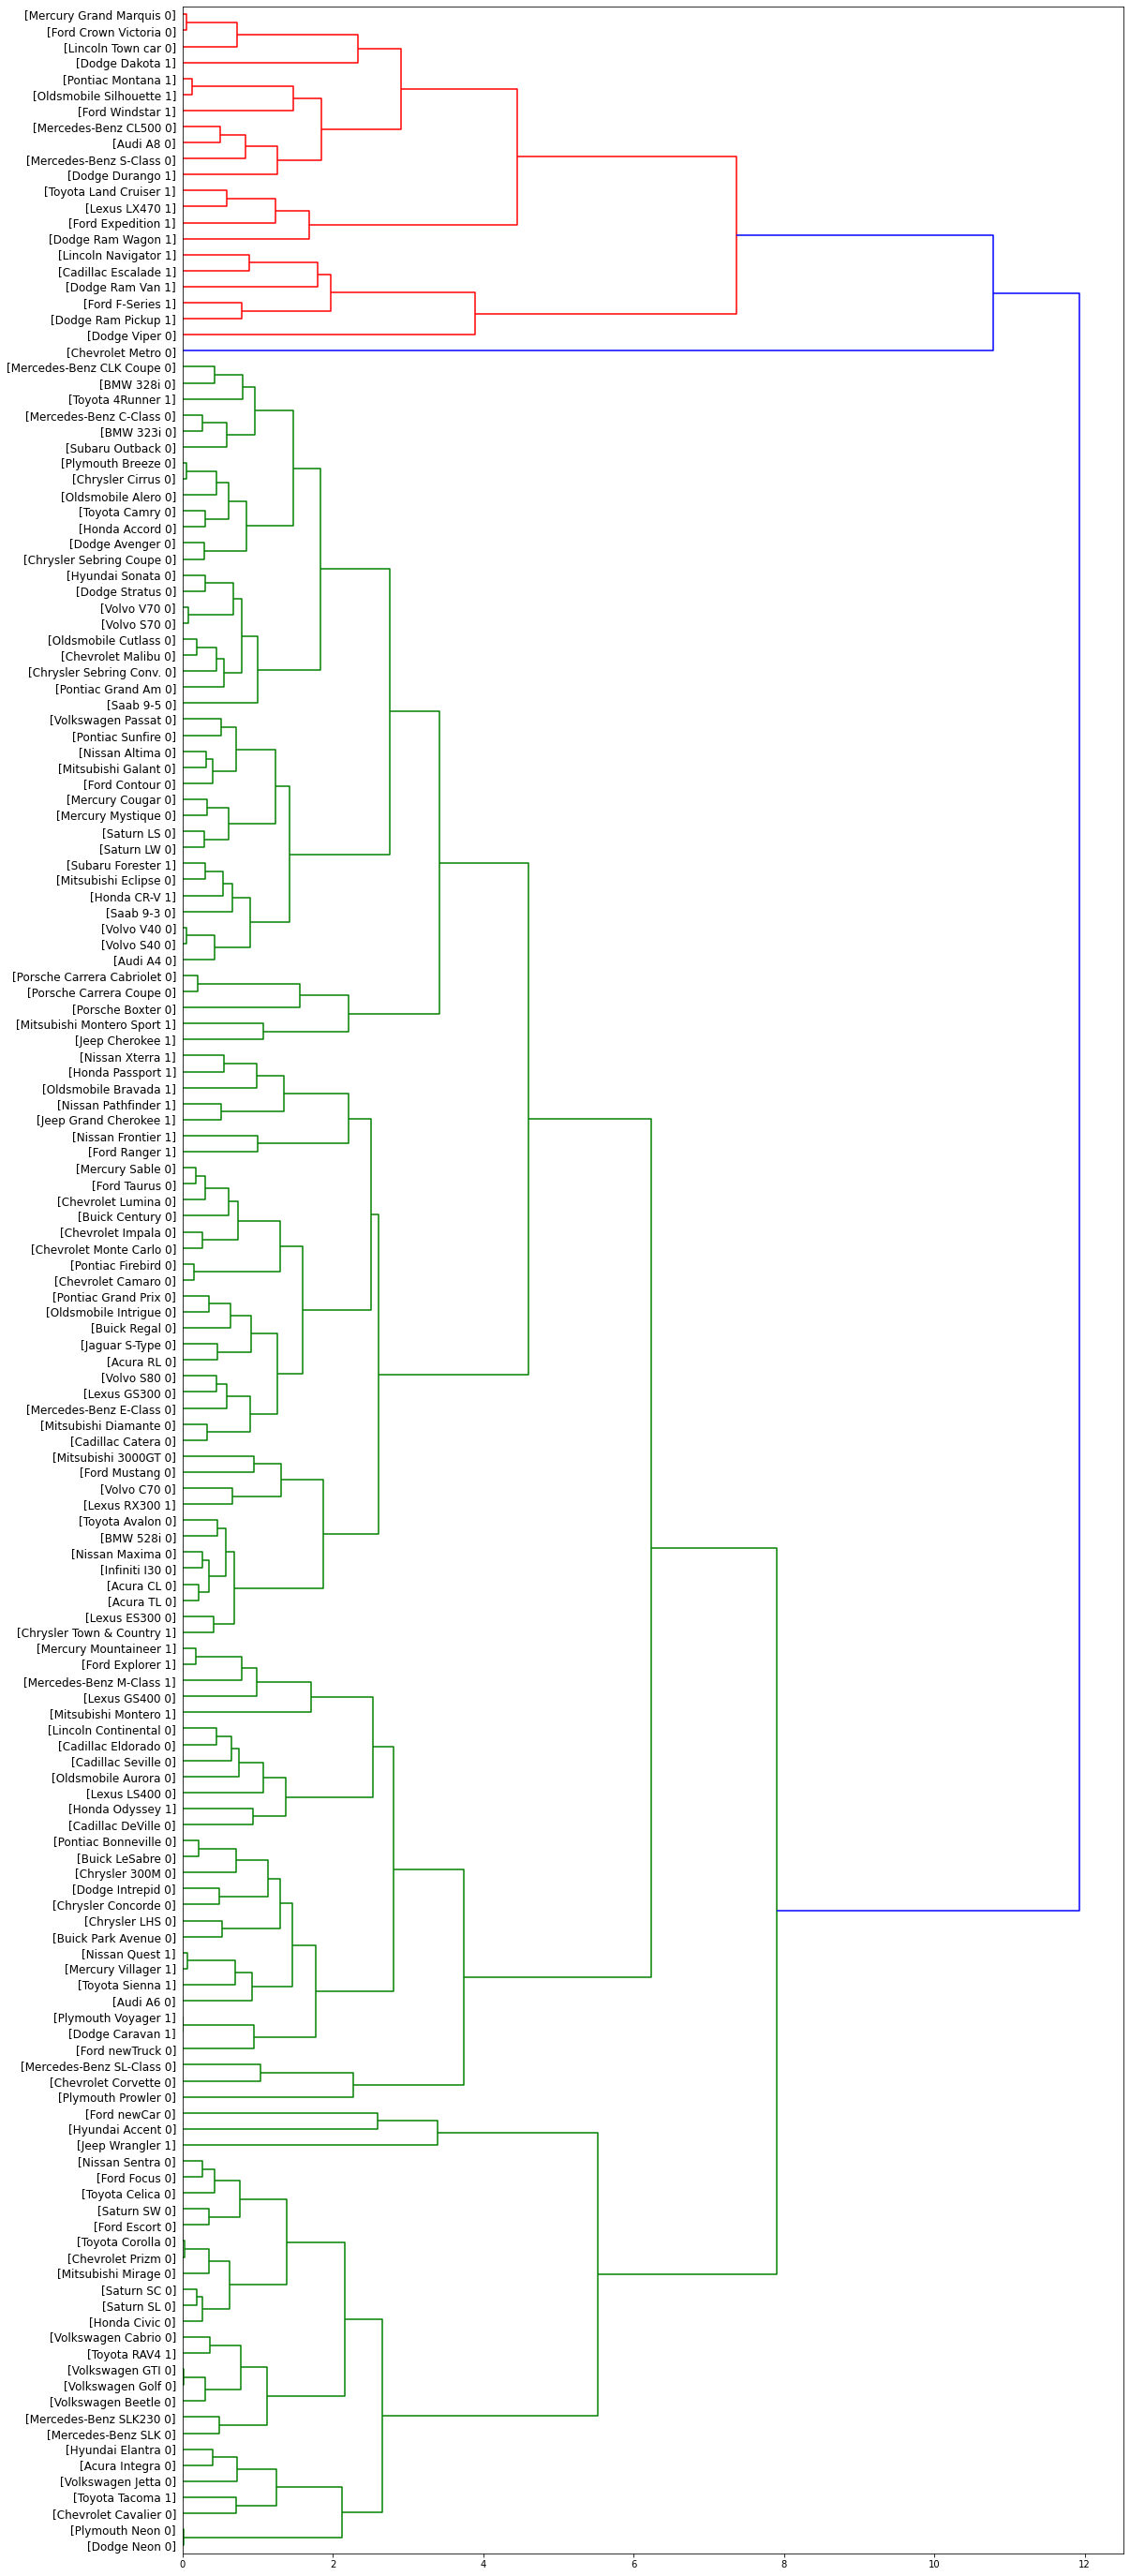

In [80]:
#plot the dendogram
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

**Clustering with Scikit learn**

In [81]:
from sklearn.metrics.pairwise import euclidean_distances

In [82]:
dist_matrix = euclidean_distances(feature_mtx, feature_mtx)
dist_matrix

array([[0.        , 0.56004708, 0.54342465, ..., 0.6575048 , 0.62435289,
        0.80552727],
       [0.56004708, 0.        , 0.04822732, ..., 0.23115617, 0.9070353 ,
        0.42690608],
       [0.54342465, 0.04822732, 0.        , ..., 0.23633051, 0.879962  ,
        0.42431572],
       ...,
       [0.6575048 , 0.23115617, 0.23633051, ..., 0.        , 0.98000482,
        0.38034196],
       [0.62435289, 0.9070353 , 0.879962  , ..., 0.98000482, 0.        ,
        1.00496569],
       [0.80552727, 0.42690608, 0.42431572, ..., 0.38034196, 1.00496569,
        0.        ]])

In [83]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, "complete")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


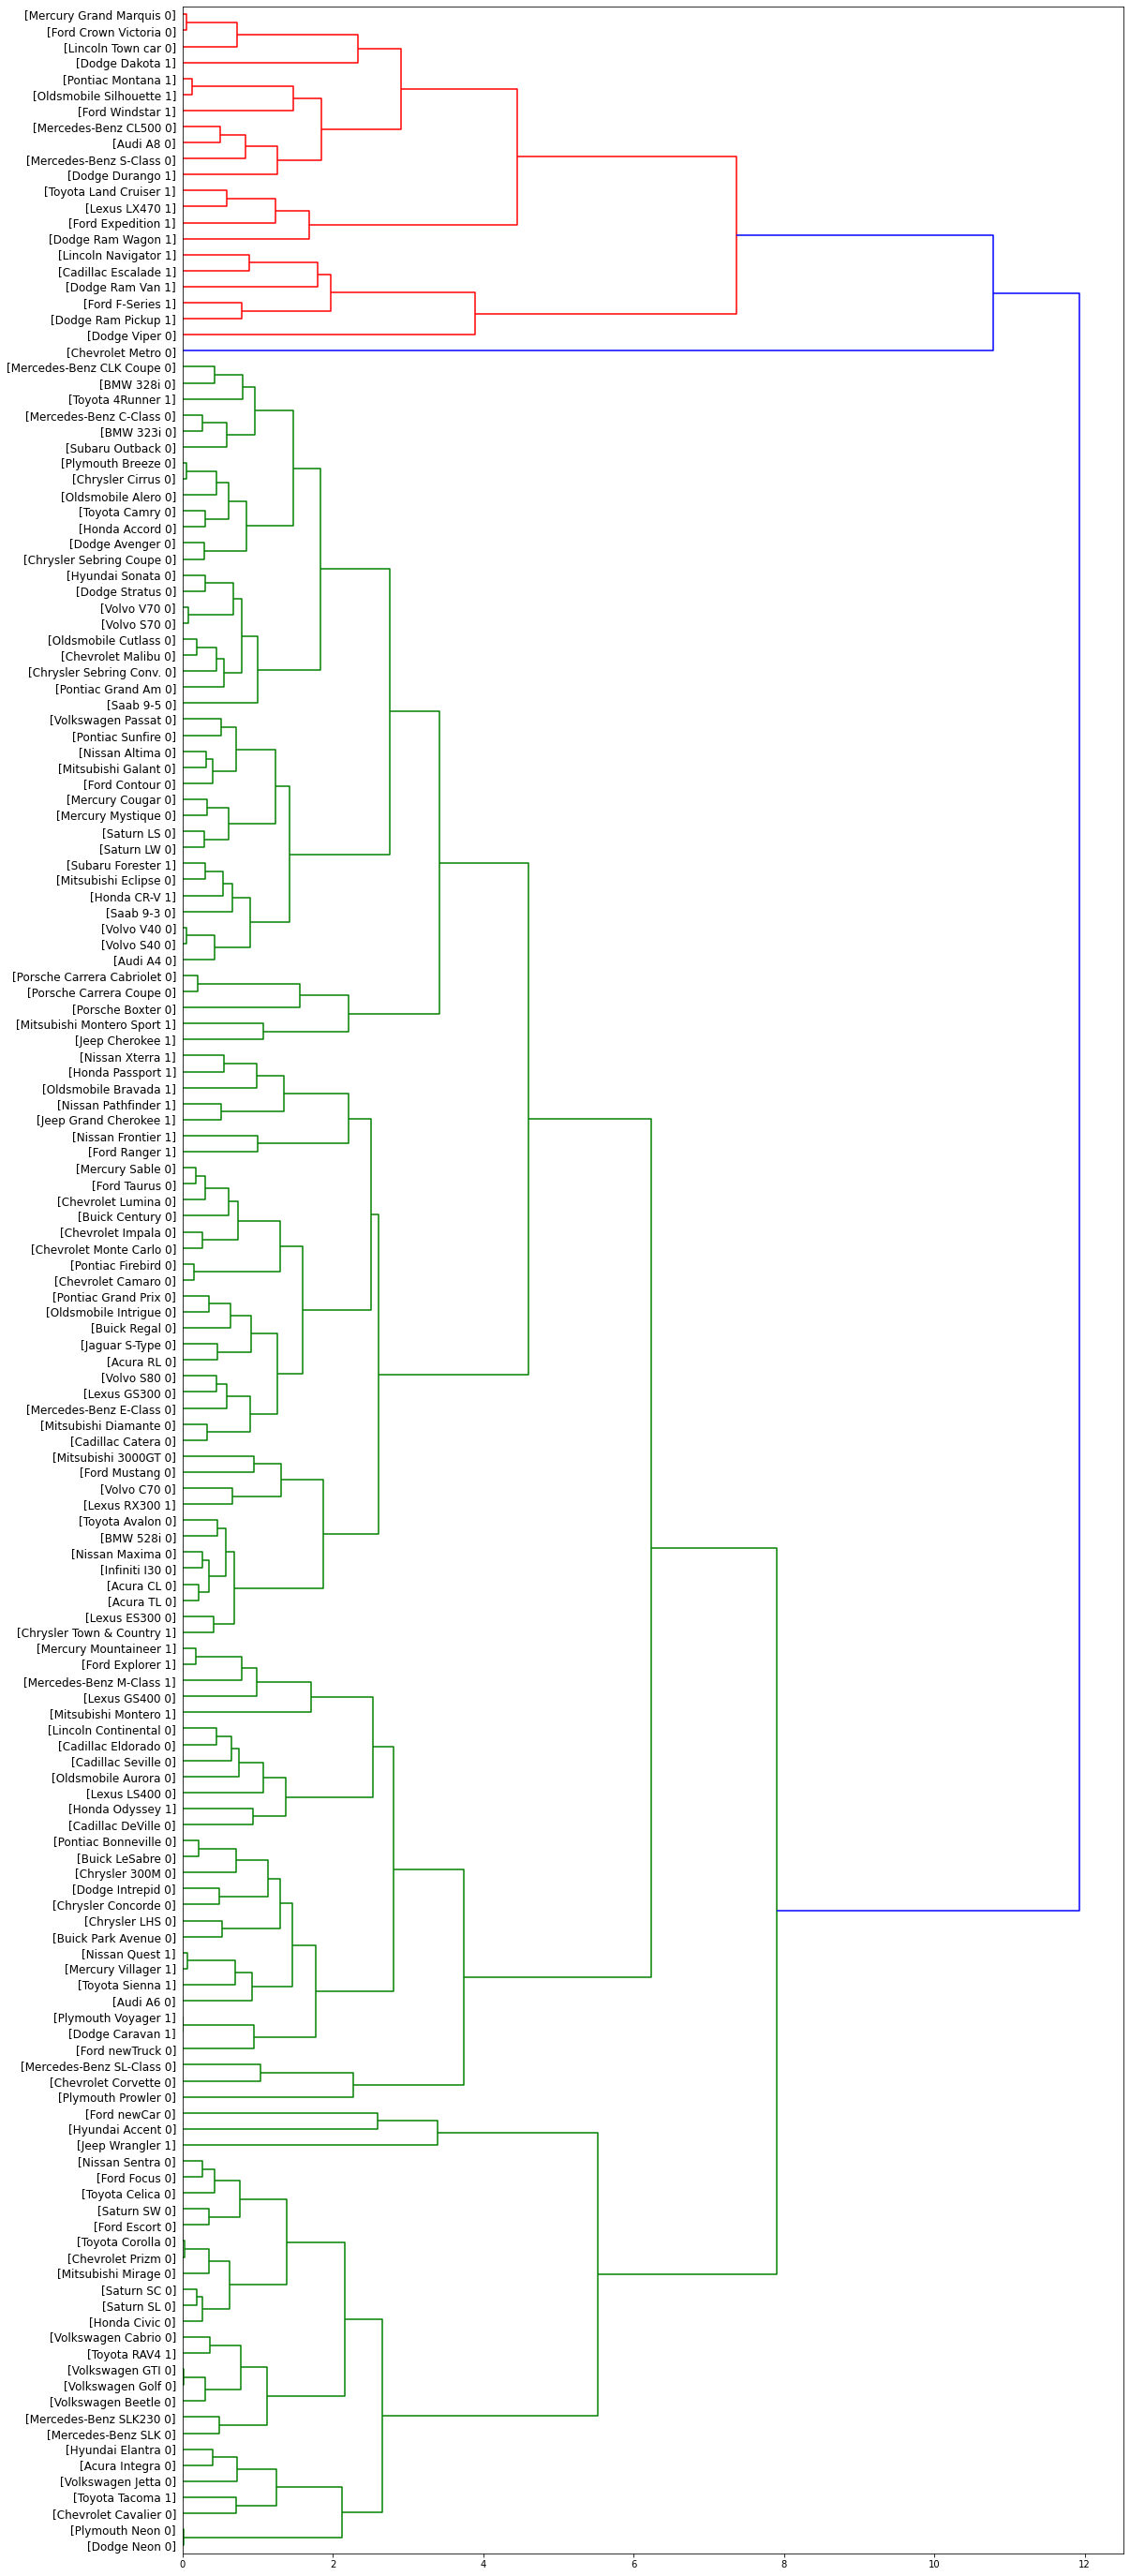

In [85]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Now, we can use the **AgglomerativeClustering** function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

* Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
* Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
* Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [86]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 4, 0, 1, 1,
       1, 1, 2, 0, 5, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 4, 4, 3, 4, 3,
       3, 2, 0, 1, 1, 1, 0, 3, 2, 3, 3, 1, 4, 0, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 2, 2, 3, 1, 2, 3, 4, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 3, 2, 2, 1, 1, 3, 2, 0, 0, 1, 3, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 3, 0, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 1, 3, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 2])

In [87]:
df["cluster_"] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,0
1,Acura,TL,39.384,19.875,0.0,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,1
2,Acura,CL,14.114,18.225,0.0,27.396605,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2.647,0.0,1
3,Acura,RL,8.588,29.725,0.0,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,1
4,Audi,A4,20.397,22.255,0.0,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

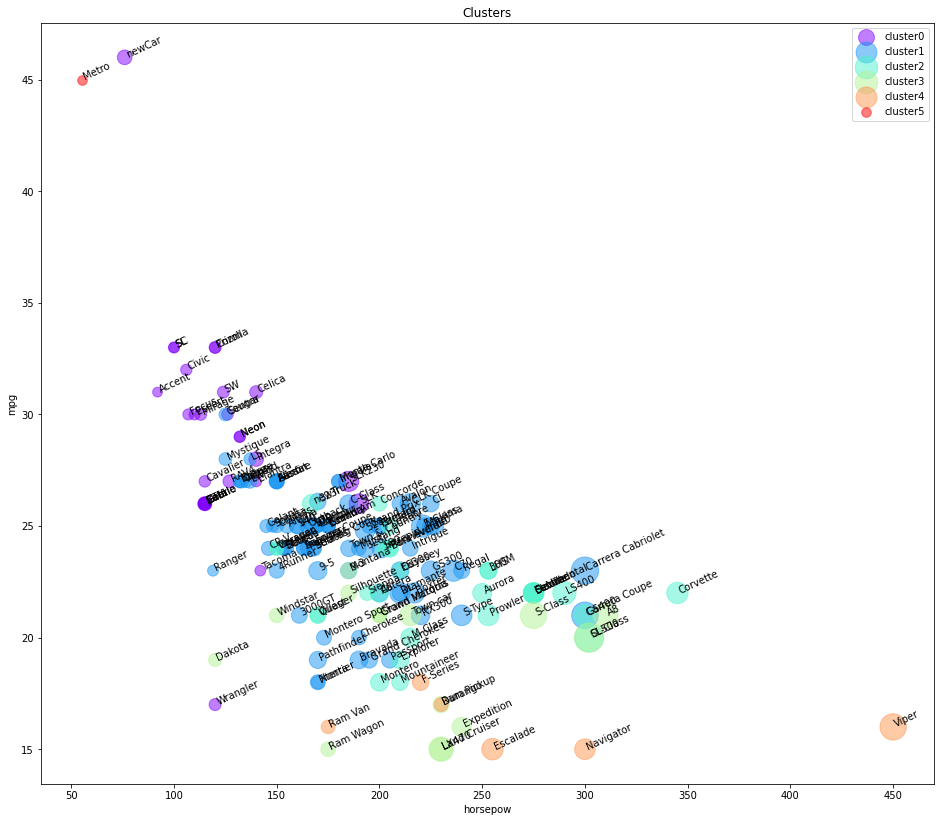

In [89]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

As you can see, we are seeing the distribution of each cluster using the scatter plot, but it is not very clear where is the centroid of each cluster. Moreover, there are 2 types of vehicles in our dataset, "truck" (value of 1 in the type column) and "car" (value of 0 in the type column). So, we use them to distinguish the classes, and summarize the cluster. First we count the number of cases in each group:

In [92]:
df.groupby(["cluster_", "type"])["cluster_"].count()

cluster_  type    
0         0.000000    24
          0.261146     1
          1.000000     3
1         0.000000    66
          1.000000    14
2         0.000000    18
          0.261146     1
          1.000000    10
3         0.000000     6
          1.000000     9
4         0.000000     1
          1.000000     5
5         0.000000     1
Name: cluster_, dtype: int64

now we can look the charasteristics of each cluster

In [93]:
agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


horsepow  engine_s        mpg      price
cluster_ type                                                
0        0.000000  123.625000  1.933333  29.166667  16.359875
         0.261146   76.000000  1.500000  46.000000  21.500000
         1.000000  129.666667  2.300000  22.333333  14.292000
1        0.000000  182.045455  2.769697  24.831808  26.552252
         1.000000  174.866637  3.153843  20.785668  24.015186
2        0.000000  253.500000  3.955556  22.611075  38.377167
         0.261146  167.000000  3.500000  26.000000  34.200000
         1.000000  187.900000  3.260000  21.000000  26.228900
3        0.000000  250.333333  4.550000  20.833333  50.888333
         1.000000  193.888889  3.933333  18.111111  31.662556
4        0.000000  450.000000  8.000000  16.000000  69.725000
         1.000000  236.000000  4.960000  16.200000  30.771000
5        0.000000   55.000000  1.000000  45.000000   9.235000

It is obvious that we have 3 main clusters with the majority of vehicles in those.

**Cars:**

* Cluster 1: with almost high mpg, and low in horsepower.

* Cluster 2: with good mpg and horsepower, but higher price than average.

* Cluster 3: with low mpg, high horsepower, highest price.

**Trucks:**

* Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.
* Cluster 2: with almost low mpg and medium horsepower, but higher price than average.
* Cluster 3: with good mpg and horsepower, low price.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

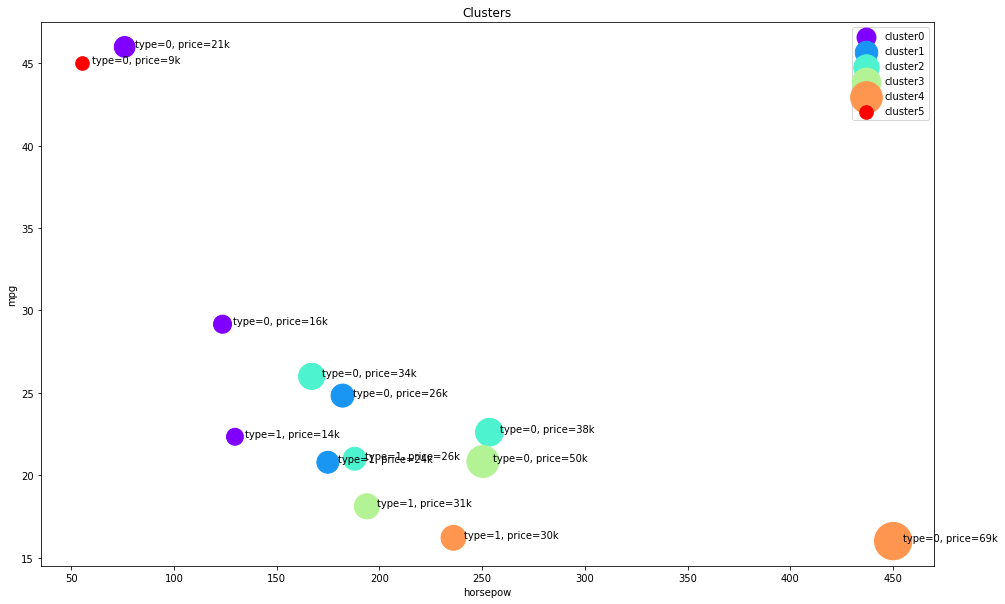

In [94]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')